In [1]:
from models import *
import pandas as pd
import numpy as np
import tensorflow as tf
import shutil
import os
print("Tensorflow version: ", tf.__version__)

excel_reports = ".\Excel reports"
saved_models = ".\Saved models"
trained_models = ".\Trained models"

# Initiate parameters
ticker = 'clb'
period = "1wk"

sentiment = True
# APISentiment	VaderSentiment	CombinedVaderSentiment RobertaLargeSentiment #TwitterSentiment
sentiment_type = 'CombinedVaderSentiment'
aggr_function = 'median'

formation_window = 17
target_window = 1

split_ratio = 0.80

# Do not change
window_size = formation_window + 1

if sentiment == False:
    news_df = None
if sentiment_type == 'TwitterSentiment':
    twitter = True
else:
    twitter = False
    
# Print stuffs
print("\nwindow size: ", window_size)
print("formation_window: ", formation_window)
print("target_window: ", target_window)
print("chart period: ", period)

# training batches
batch_size_train = 16
batch_size_valid = 4

# Period model is trained and tested
start_date = '2020-01-01'  # ''2020-01-01   2015-01-01
end_date = '2022-09-10'  # '' 2022-08-17

# #Delete folders
shutil.rmtree(excel_reports)
shutil.rmtree(saved_models)
shutil.rmtree(trained_models)

# Create folder, if exist pass exception
try:
    os.mkdir("Excel reports")
    os.mkdir("Saved models")
    os.mkdir("Trained models")
except:
    pass


Tensorflow version:  2.9.1

window size:  18
formation_window:  17
target_window:  1
chart period:  1wk


In [2]:
if sentiment == True:

    from sentiment import GetNews

    GetNewsAPI = GetNews()

    api_key = '631505e804ec58.42743136'

    GetNewsAPI.fit(ticker=ticker, start_date=start_date, end_date=end_date,
                   n_news=1000, token=api_key, offset=0, export_excel=True, twitter=twitter)
    news_df = GetNewsAPI.transform()
news_df


c:\Users\z0040jeb\Desktop\MachineLearning\Data Science\VSCode\04_StockPrediction\04_stockprediction\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\z0040jeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\z0040jeb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


--------> GetNews completed



,Date,Title,Content,APISentiment,VaderSentiment,CombinedVaderSentiment
0,2022-09-07,SLB vs. CLB: Which Stock Is the Better Value O...,Investors interested in stocks from the Oil an...,0.998,0.6486,1.6466
1,2022-08-24,Should You Be Concerned About Core Laboratorie...,Many investors are still learning about the va...,0.987,0.0000,0.9870
2,2022-08-22,SLB vs. CLB: Which Stock Should Value Investor...,Investors interested in Oil and Gas - Field Se...,0.997,0.3400,1.3370
3,2022-08-11,"Why Devon Energy, Tellurian, and Core Laborato...",Shares of oil and gas explorer Devon Energy (N...,0.942,0.2732,1.2152
4,2022-08-05,SLB or CLB: Which Is the Better Value Stock Ri...,Investors looking for stocks in the Oil and Ga...,0.999,0.6486,1.6476
...,...,...,...,...,...,...
167,2020-08-27,9th Annual Gateway Conference to Virtually Sho...,Executives from a Range of Industries to Prese...,0.996,0.0000,0.9960
168,2020-08-27,9th Annual Gateway Conference to Virtually Sho...,Executives from a Range of Industries to Prese...,0.996,0.0000,0.9960
169,2020-08-20,Top 2nd-Quarter Buys of John Rogers' Ariel Inv...,"- By Margaret Moran\n\nJohn Rogers (Trades, Po...",0.999,0.2023,1.2013
170,2020-08-20,Top 2nd-Quarter Buys of John Rogers' Ariel Inv...,"- By Margaret Moran\n\nJohn Rogers (Trades, Po...",0.999,0.2023,1.2013


In [3]:
from transformers_preprocess import PullData

GetData = PullData()

GetData.fit(ticker=ticker,
            start_date=start_date,
            end_date=end_date,
            interval=period,  # 1wk
            progress=False,
            condition=False,
            form_window=formation_window,
            target_window=target_window,
            timeperiod1=6,
            timeperiod2=12,
            timeperiod3=24,
            export_excel=True,
            excel_path=excel_reports,
            listed_conditions=None,
            sentiment=sentiment,
            sentiment_type=sentiment_type, #sentiment_type
            news_df=news_df,
            chart_period=period,
            sentiment_aggr=aggr_function)

data_prep = GetData.transform()

# Validation
if window_size != (formation_window + 1):
    raise Exception(
        f"Error - window_size ({window_size}) must be equal to sum of formation_window ({formation_window}) and value 1.")
data_prep.head()


initial shape:  (152, 6)
Output shape:  (2232, 10)
--------> PullData completed



,Date,Open,High,Low,Close,EMA6,EMA12,EMA24,CombinedVaderSentiment,trades
0,2019-12-30 00:00:00,39.400002,40.240002,36.500000,40.090000,37.968334,30.156667,23.542917,0.0,1
1,2020-01-06 00:00:00,40.000000,41.610001,39.470001,40.230000,37.968334,30.156667,23.542917,0.0,1
2,2020-01-13 00:00:00,40.380001,40.970001,39.369999,39.830002,37.968334,30.156667,23.542917,0.0,1
3,2020-01-20 00:00:00,39.549999,39.980000,37.419998,37.869999,37.968334,30.156667,23.542917,0.0,1
4,2020-01-27 00:00:00,36.810001,37.130001,34.599998,35.130001,37.968334,30.156667,23.542917,0.0,1


In [4]:
####################################################################

from transformers_preprocess import NormalizeData

NormalizeData = NormalizeData()

NormalizeData.fit(window_size=window_size, shuffle=False, debug=False,
                  export_excel=True, excel_path=excel_reports, sentiment=sentiment)

data_normalized, Dates = NormalizeData.transform(data_prep)
data_normalized.head()
# Get only forecasts for model testing
# x_valid_x = data_normalized[['maxv','minv']].copy() #extreme values for reverting normalization
# x_valid = data_normalized.iloc[:,:-2].copy() #dataset for forecast


Dataframe shape:  (2232, 10)
Number of formations:  124
--------> NormalizeData completed



,Open,High,Low,Close,EMA6,EMA12,EMA24,CombinedVaderSentiment,maxv,minv
0,0.936731,0.960779,0.853707,0.956484,0.895744,0.672106,0.482763,0.0,41.610001,6.68
1,0.953908,1.000000,0.938735,0.960492,0.895744,0.672106,0.482763,0.0,41.610001,6.68
2,0.964787,0.981678,0.935872,0.949041,0.895744,0.672106,0.482763,0.0,41.610001,6.68
3,0.941025,0.953335,0.880046,0.892929,0.895744,0.672106,0.482763,0.0,41.610001,6.68
4,0.862582,0.871744,0.799313,0.814486,0.895744,0.672106,0.482763,0.0,41.610001,6.68


In [5]:
####################################################################

from training import SplitData

SplitData = SplitData()

SplitData.fit(split_ratio=split_ratio, window_size=window_size,
              dates=Dates, debug=False, export_excel=True, excel_path=excel_reports, sentiment=sentiment)

x_train, x_valid, x_train_x, x_valid_x = SplitData.transform(data_normalized)
# x_train.head(25)



Split ratio: 80 %
train period: 2019-12-30 - 2022-03-07
valid period: 2021-11-22 - 2022-08-29
x_train window:  99.0
x_valid window:  25.0
--------> SplitData completed



In [6]:
from training import GetTensoredDataset

GetTensoredDataset = GetTensoredDataset()

GetTensoredDataset.fit(window_size=window_size, batch_size=batch_size_train, train=True, debug=False)

x_train_tensors, _ = GetTensoredDataset.transform(x_train)

# c = 0
# for batch in x_train_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break

--------> GetTensoredDataset completed



In [7]:
from training import GetTensoredDataset

GetTensoredValidDataset = GetTensoredDataset()

GetTensoredValidDataset.fit(
    window_size=window_size, batch_size=batch_size_valid, train=False, debug=False)

x_valid_tensors, labels = GetTensoredValidDataset.transform(x_valid)

# for batch in x_valid_tensors:
#     if c < 3:
#         print(batch)
#     else:
#         break

--------> GetTensoredDataset completed



<b>Model Training</b>

In [10]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint


model_name = f'{saved_models}/{str.upper(ticker)}_{formation_window}_{target_window}_{window_size}_{split_ratio}_{period}_{sentiment}_{start_date}_{end_date}.h5'

early_stopping = EarlyStopping(
    monitor='val_loss', patience=6, mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=10e-15,
                              verbose=1)

model_checkpoint = ModelCheckpoint(monitor='val_loss',
                                   filepath=model_name,
                                   save_best_only=True)

callbacks = [early_stopping, reduce_lr, model_checkpoint]


def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true*y_pred, 0),
                    penalty * tf.square(y_true-y_pred),
                    tf.square(y_true - y_pred)
                    )

    return(tf.reduce_mean(loss, axis=-1))


tf.keras.losses.sign_penalty = sign_penalty


In [12]:
# from testing import *
# params = [2,3]
# df = training5(params,labels,x_train_tensors, x_valid_tensors, x_valid, window_size, callbacks)
# df

Get Model

In [10]:
tf.random.set_seed(7788)
np.random.seed(7788)

features = x_train.shape[1]
print(f"Model training - {str.upper(ticker)} \n")

#model = clb_model(features)
#model = mrk_model(features)
#model =  mrk_model_sent_medium(features)

model = tf.keras.models.Sequential([

        tf.keras.layers.Conv1D(filters=8, kernel_size=1,
                               strides=1, padding="same",
                               activation=tf.nn.selu,
                               input_shape=[None, features]),
        tf.keras.layers.Conv1D(filters=16, kernel_size=1,
                               strides=1, padding="same",
                               activation=tf.nn.selu,
                               #input_shape=[None, 7]
                               ),
        tf.keras.layers.Conv1D(filters=32, kernel_size=10,
                               strides=1, padding="same",
                               activation=tf.nn.selu,
                               #input_shape=[None, 7]
                               ),

        tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(12, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(12)),
        tf.keras.layers.Dense(4, activation=tf.nn.selu),
        tf.keras.layers.Dense(4, activation=tf.nn.selu),
        tf.keras.layers.Dense(3, activation=tf.nn.selu),
        tf.keras.layers.Dense(3, activation=tf.nn.selu),
        tf.keras.layers.Dense(3, activation=tf.nn.selu),
        tf.keras.layers.Dense(2, activation=tf.nn.selu),
        tf.keras.layers.Dense(1, activation=tf.nn.relu),
    ])

optimizer2 = tf.keras.optimizers.Adam(
    learning_rate=0.0009, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
optimizer5 = tf.keras.optimizers.Adagrad(
    learning_rate=0.005, initial_accumulator_value=8, epsilon=1e-07, name='Adagrad')

model.compile(loss=sign_penalty,
              optimizer=optimizer2,
              )

model.fit(x_train_tensors, epochs=1200, callbacks=[
          callbacks], validation_data=x_valid_tensors)


Model training - CLB 

Epoch 1/1200
7/7 [==============================] - 10s 565ms/step - loss: 0.3553 - val_loss: 0.2107 - lr: 9.0000e-04
Epoch 2/1200
7/7 [==============================] - 0s 38ms/step - loss: 0.0771 - val_loss: 0.0444 - lr: 9.0000e-04
Epoch 3/1200
7/7 [==============================] - 0s 23ms/step - loss: 0.1477 - val_loss: 0.0617 - lr: 9.0000e-04
Epoch 4/1200
7/7 [==============================] - 0s 35ms/step - loss: 0.0498 - val_loss: 0.0355 - lr: 9.0000e-04
Epoch 5/1200
7/7 [==============================] - 0s 38ms/step - loss: 0.0602 - val_loss: 0.0309 - lr: 9.0000e-04
Epoch 6/1200
7/7 [==============================] - 0s 23ms/step - loss: 0.0365 - val_loss: 0.0399 - lr: 9.0000e-04
Epoch 7/1200
5/7 [====================>.........] - ETA: 0s - loss: 0.0338
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00017999999690800907.
7/7 [==============================] - 0s 22ms/step - loss: 0.0307 - val_loss: 0.0335 - lr: 9.0000e-04
Epoch 8/1200
7/7 [======

In [115]:
def model_forecast(model, series, window_size, debug):
    """
    Get model, data and window size as an input. 
    Make prediction window is subtracted by 1, since we do not need label in window, 
    label value is skipped
    """
    c = 0

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size-1, shift=window_size, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))

    if debug == True:
        # This block of code will print out data on which is made prediction
        for item in ds:
            c += 1
            if c < 3:
                print("\n"+str(c) + " prediction:\n ", item)
            else:
                break

    ds = ds.batch(1).prefetch(1)
    forecast = model.predict(ds)
    forecast2 = np.squeeze(forecast)
    return forecast2


forecast = model_forecast(model, x_valid, window_size=window_size, debug=False)
forecast[:2]


25/25 [==============================] - 3s 6ms/step


array([0.75730056, 0.7485551 ], dtype=float32)

In [116]:
# pr = x_valid.iloc[:24, :].to_numpy()
# pr = np.array([pr])
# pr = np.array([pr])
# pred = tf.data.Dataset.from_tensor_slices(pr)

In [117]:
from transformers_preprocess import ReverseNormalization

ReverseNormalization = ReverseNormalization()

ReverseNormalization.fit(forecasts=forecast, labels=labels,
                         x_valid=x_valid, x_valid_x=x_valid_x, window_size=window_size, debug=False,
                         sentiment=sentiment,sentiment_type=sentiment_type)

df = ReverseNormalization.transform()
df.head(25)

--------> ReverseNormalization completed



,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment
In,,,,,,,,,,
0,24.290001,26.360001,23.920000,24.139999,25.941988,27.351200,29.134196,NaN,NaN,0.0000
1,25.000000,25.320000,21.870001,23.490000,25.241420,26.757169,28.682660,NaN,NaN,0.0000
2,24.030001,25.820000,23.660000,24.650000,25.072443,26.432989,28.360047,NaN,NaN,0.0000
3,24.290001,24.350000,21.080000,22.430000,24.317459,25.817145,27.885644,NaN,NaN,0.9980
4,21.900000,23.420000,21.260000,23.250000,24.012471,25.422200,27.514792,NaN,NaN,0.0000
5,23.360001,23.750000,21.969999,22.309999,23.526050,24.943400,27.098409,NaN,NaN,0.0000
6,22.580000,26.459999,22.370001,26.180000,24.284322,25.133646,27.024936,NaN,NaN,0.8720
7,26.139999,27.379999,25.500000,27.350000,25.160230,25.474623,27.050941,NaN,NaN,1.2910
8,27.780001,28.090000,25.150000,25.910000,25.374450,25.541604,26.959666,NaN,NaN,0.0000


In [118]:
from final_evaluation import GetFinalDataframe

GetFinalDataframe = GetFinalDataframe()

GetFinalDataframe.fit(dates=Dates,
                      x_valid=x_valid,
                      sentiment=sentiment,
                      sentiment_type=sentiment_type)

reversed_df = GetFinalDataframe.transform(df)
reversed_df.head(25)


--------> GetFinalDataframe



,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment,Datetime
In,,,,,,,,,,,
0,24.290001,26.360001,23.920000,24.139999,25.941988,27.351200,29.134196,nn,nn,0.0000,2021-11-22
1,25.000000,25.320000,21.870001,23.490000,25.241420,26.757169,28.682660,nn,nn,0.0000,2021-11-29
2,24.030001,25.820000,23.660000,24.650000,25.072443,26.432989,28.360047,nn,nn,0.0000,2021-12-06
3,24.290001,24.350000,21.080000,22.430000,24.317459,25.817145,27.885644,nn,nn,0.9980,2021-12-13
4,21.900000,23.420000,21.260000,23.250000,24.012471,25.422200,27.514792,nn,nn,0.0000,2021-12-20
5,23.360001,23.750000,21.969999,22.309999,23.526050,24.943400,27.098409,nn,nn,0.0000,2021-12-27
6,22.580000,26.459999,22.370001,26.180000,24.284322,25.133646,27.024936,nn,nn,0.8720,2022-01-03
7,26.139999,27.379999,25.500000,27.350000,25.160230,25.474623,27.050941,nn,nn,1.2910,2022-01-10
8,27.780001,28.090000,25.150000,25.910000,25.374450,25.541604,26.959666,nn,nn,0.0000,2022-01-17


In [119]:
from final_evaluation import GetModelPerformance
#print(f"Window size: {window_size} \n")
print(f"ticker: {str.upper(ticker)}\n")
GetModelPerformance = GetModelPerformance()

GetModelPerformance.fit(acceptance=0,
                        penalization=0,
                        entry_candle='Current Open',
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports,
                        sentiment=sentiment)

trades_df = GetModelPerformance.transform(reversed_df)
#trades_df.head(25)


ticker: CLB

Formations:  25
period: 2021-11-22 - 2022-08-29
Entry Candle:  Current Open

Total Trades:  19
Profit Trades:  12
Loss Trades:  7

Win Ratio: 63.0 %
Loss Ratio: 37 %

Trade nr with exact TP:  3
Ratio of exact TP: 16.0 %

Average profit per trade:  315

Gross profit:  5987
Gross loss:  -7502

Net profit:  -1515


In [43]:
trade = 1
budget = 10000
entry_candle = 'Current Open'

Trade:  2
Window size:  13
Period: 2022-01-17 - 2022-04-04

Budget:  10000

Entry price:  217.03
Label (target):  229.22
Model prediction:  218.87
Market Change: 1.84 $
Profit: 84.78 $


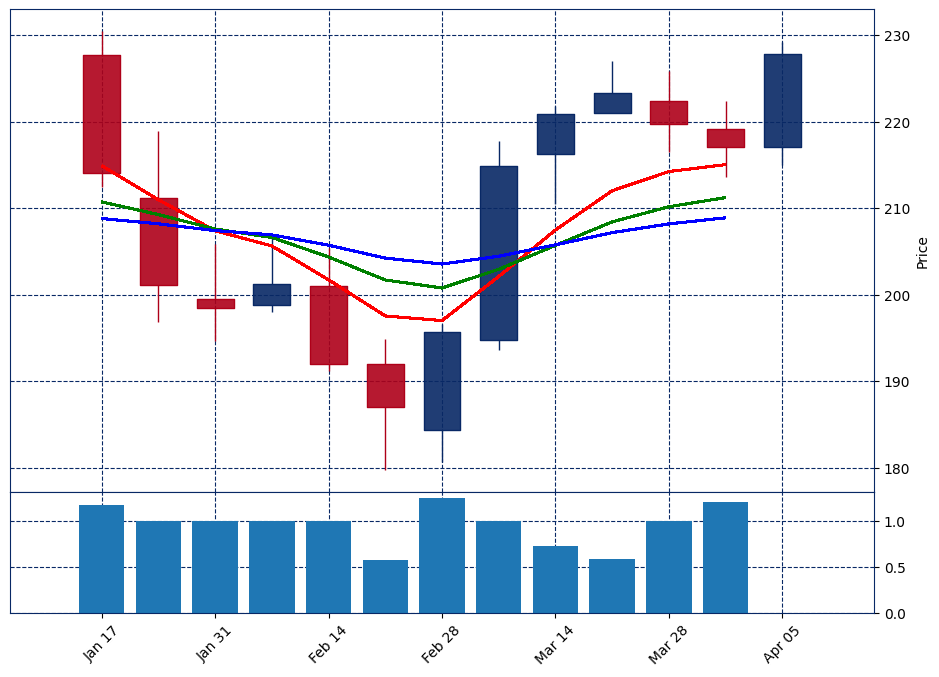

,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment,Datetime,profit,trade
In,,,,,,,,,,,,,
52,227.710007,230.429993,212.419998,214.089996,214.896307,210.720962,208.793579,nn,nn,1.17170,2022-01-17,1.83932,2
53,211.160004,218.880005,196.800003,201.160004,210.971649,209.250045,208.182893,nn,nn,0.99100,2022-01-24,1.83932,2
54,199.449997,205.869995,194.679993,198.410004,207.382607,207.582347,207.401062,nn,nn,0.99650,2022-01-31,1.83932,2
55,198.839996,206.750000,198.029999,201.240005,205.627578,206.606602,206.908177,nn,nn,0.99400,2022-02-07,1.83932,2
56,200.949997,205.419998,191.179993,191.949997,201.719698,204.351740,205.711523,nn,nn,1.00000,2022-02-14,1.83932,2
57,191.949997,194.899994,179.669998,187.059998,197.531212,201.691472,204.219401,nn,nn,0.57650,2022-02-21,1.83932,2
58,184.339996,196.580002,180.639999,195.660004,196.996581,200.763553,203.534649,nn,nn,1.24315,2022-02-28,1.83932,2
59,194.789993,217.770004,193.619995,214.830002,202.091844,202.927622,204.438277,nn,nn,1.00000,2022-03-07,1.83932,2
60,216.300003,221.779999,210.509995,220.910004,207.468461,205.694143,205.756015,nn,nn,0.72870,2022-03-14,1.83932,2


In [63]:
#trade = 2
from plotting import PlotTrade

df = PlotTrade(trade=trade,trades_df=trades_df,window_size=window_size,entry_candle=entry_candle,budget=budget,sentiment=sentiment)
trade += 1
df


In [45]:
from final_evaluation import GetPerformanceReport

GetPerformanceReport = GetPerformanceReport()

GetPerformanceReport.fit(entry_candle="Current Open",
                        budget=10000,
                        window_size=window_size,
                        export_excel=True,
                        excel_path = excel_reports)

trades_df_final = GetPerformanceReport.transform(trades_df)
trades_df_final


--------> GetPerformanceReport completed



,Open,High,Low,Close,EMA6,EMA12,EMA24,labels,prediction,CombinedVaderSentiment,Datetime,profit,trade,Entry,Performance
0,13.43,14.34,12.58,12.68,14.541246,17.697339,25.855426,nn,nn,0.9340,2022-02-07,0.284308,1,nn,nn
1,12.64,13.17,10.42,10.71,13.446604,16.622363,24.643792,nn,nn,0.5961,2022-02-14,0.284308,1,nn,nn
2,10.49,11.54,9.62,11.42,12.867575,15.822000,23.585889,nn,nn,1.2940,2022-02-21,0.284308,1,nn,nn
3,11.22,11.53,9.71,9.73,11.971125,14.884769,22.477417,nn,nn,0.9745,2022-02-28,0.284308,1,nn,nn
4,9.87,10.57,8.92,8.93,13.446604,16.622363,24.643792,10.57,10.154308,0.0000,2022-03-01,0.284308,1,9.87,288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11.27,12.24,11.14,12.06,10.315481,9.965624,11.640610,nn,nn,0.0000,2022-08-08,0.940000,20,nn,nn
96,11.87,12.39,8.25,9.06,9.956773,9.826297,11.434161,nn,nn,0.7510,2022-08-15,0.940000,20,nn,nn
97,8.51,10.24,8.50,9.60,9.854838,9.791482,11.287428,nn,nn,1.0572,2022-08-22,0.940000,20,nn,nn
98,9.37,9.96,8.79,8.90,9.582027,9.654331,11.096434,nn,nn,0.9840,2022-08-29,0.940000,20,nn,nn


In [22]:
from final_evaluation import MakeSinglePrediction

model_name = f'{saved_models}/{str.upper(ticker)}_{formation_window}_{target_window}_{window_size}_{split_ratio}_{period}_{sentiment}_{start_date}_{end_date}.h5'

MakeSinglePrediction = MakeSinglePrediction()

fit_output = MakeSinglePrediction.fit(
                        model_name=model_name,
                        form_window=formation_window,
                        ticker=ticker,
                        start_date="2021-03-18",
                        end_date="2022-09-09",
                        interval='1wk',
                        progress=False,
                        condition=False,
                        timeperiod1=6,
                        timeperiod2=12,
                        timeperiod3=24,
                        debug=False,
                        budget=10000,
                        penalization=0,
                        acceptance=0,
                        entry_candle='Current Close',
                        news_df=news_df,
                        sentiment=sentiment,
                        sentiment_type = sentiment_type,
                        sentiment_aggr = aggr_function)

#fit method outputs tuple, get only trade formation out of tuple
trade_formation = fit_output[1]
final_trade_formation = trade_formation.tail(24)
final_trade_formation
###IMPORTANT!!!!
#trade_formation dataframe must be checked before transformation, sometimes df pulled via yahoo finance 
# is shifted, and trade formation does not have entire formation in itself. in this case there must 
# be changed end_date in fit method
final_trade_formation


,Date,Open,High,Low,Close,EMA6,EMA12,EMA24,CombinedVaderSentiment
1,2022-03-28,81.370003,83.580002,80.730003,83.519997,80.333678,79.380810,78.686010,0.657994
2,2022-04-04,83.500000,87.839996,82.730003,87.680000,82.432628,80.657608,79.405529,1.073374
3,2022-04-11,88.320000,89.480003,84.830002,86.910004,83.711878,81.619515,80.005887,0.566400
4,2022-04-18,86.419998,87.449997,84.500000,84.589996,83.962769,82.076512,80.372616,0.616908
5,2022-04-25,84.589996,90.010002,83.529999,88.690002,85.313407,83.093972,81.038007,0.589609
6,2022-05-02,88.720001,88.919998,86.360001,88.389999,86.192433,83.908746,81.626166,0.774300
7,2022-05-09,87.500000,91.050003,86.910004,90.410004,87.397453,84.908939,82.328873,0.138086
8,2022-05-16,90.790001,94.559998,90.680000,93.550003,89.155325,86.238334,83.226564,1.018028
9,2022-05-23,93.589996,94.919998,91.000000,93.080002,90.276661,87.290898,84.014839,0.609450
10,2022-05-30,91.910004,92.620003,88.739998,89.910004,90.171902,87.693837,84.486452,0.758306



Ticker:  mrk
1/1 [==============================] - 1s 1s/step

Entry candle (Current Close)

Budget:  10000

Entry price:  87.42
Prediction:  91.31
Expected Market move:  3.89
Expected Profit:  444.02


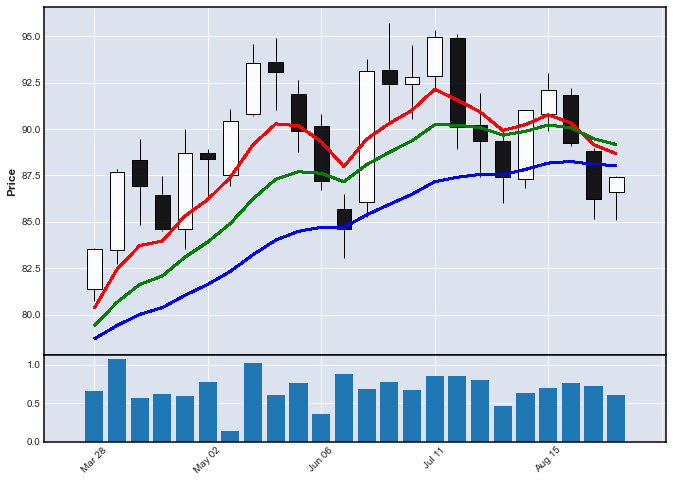

In [23]:
#Make prediction
MakeSinglePrediction.transform(final_trade_formation)

#PLot current chart and sentiment
from plotting import PlotCurrentFormation

PlotCurrentFormation(final_trade_formation,sentiment=sentiment)


<b>Record Predictions</b>

In [21]:
final_df = pd.DataFrame()
#List all predictions
dicti_prediction1 = {'ticker':['STNSE'],'Date':['21.8.2022'],'prediction':['12.97 (should be penalized by 2 - 10.97)'],'real market move':['pending'],'model':[""]}
dicti_prediction2 = {'ticker':['CLB'],'Date':['21.8.2022'],'prediction':['18.6'],'real market move':['succesful - 12.9.2022'],'model':[""]}
dicti_prediction3 = {'ticker':['MRK'],'Date':['27.8.2022'],'prediction':['93.23'],'real market move':['pending'],'model':[""]}
dicti_prediction4 = {'ticker':['CLB'],'Date':['04.9.2022'],'prediction':['18.08'],'real market move':['succesful - 9.9.2022'],'model':[model_name]}
dicti_prediction5 = {'ticker':['MRK'],'Date':['11.9.2022'],'prediction':['91.31'],'real market move':['pending'],'model':[model_name]}

trades_tuple = (dicti_prediction1,dicti_prediction2,dicti_prediction3,dicti_prediction4,dicti_prediction5)
for item in trades_tuple:
    df_pred = pd.DataFrame(item)
    final_df = final_df.append(df_pred)
    final_df = final_df.sort_values('ticker',ascending=False)
final_df

,ticker,Date,prediction,real market move,model
0,STNSE,21.8.2022,12.97 (should be penalized by 2 - 10.97),pending,
0,MRK,27.8.2022,93.23,pending,
0,MRK,11.9.2022,91.31,pending,.\Saved models/MRK_24_4_25_0.8_1wk_True_2020-0...
0,CLB,21.8.2022,18.6,succesful - 12.9.2022,
0,CLB,04.9.2022,18.08,succesful - 9.9.2022,.\Saved models/MRK_24_4_25_0.8_1wk_True_2020-0...
